<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-марки-стали-в-наборе-данных" data-toc-modified-id="Самые-популярные-марки-стали-в-наборе-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Самые популярные марки стали в наборе данных</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predict</a></span></li></ul></div>

In [12]:
import pandas as pd

# Полезные ссылки

[Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)  [Tuatini GODARD](https://www.kaggle.com/ekami66)

In [13]:
df_in = pd.read_csv('../data/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df_in.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646",...,"0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285",...,"0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,"24,0","43,35","17,95","43,35",NaN,"0,331665",...,"0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945",...,"0,11","2,4",NaN,NaN,"60,3","0,5","6,3","0,12","2,6",NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,"20,0","48,5","17,0333333","48,5",NaN,"0,389875",...,"0,12","2,4",NaN,NaN,"60,3","0,6","4,5","0,09","2,5",NaN


# Задача

EDA
выводы по качеству данных:
1. Пропуски
2. Нули
3. Дисперсия
4. Выбросы

Создать модель предсказания для столбцов:

* химшлак последний Al2O3
* химшлак последний CaO
* химшлак последний R
* химшлак последний SiO2

## EDA

### Самые популярные марки стали в наборе данных

Cамая популярная категория: 70.35%
Содержит 4953 записей


<AxesSubplot:ylabel='МАРКА'>

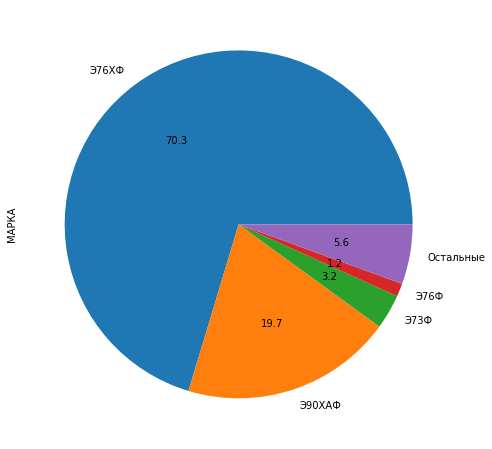

In [88]:
# Самые популярные марки стали
min_plt = 1
mat_counts = df_in.МАРКА.value_counts()
mat_counts_plt = mat_counts/df_in.МАРКА.size * 100
mat_counts_plt['Остальные'] = mat_counts_plt[mat_counts_plt < min_plt].sum()
mat_counts_plt = mat_counts_plt[mat_counts_plt >= min_plt]
print(f"""Cамая популярная категория: {round(mat_counts_plt.max(), 2)}%
Содержит {mat_counts.max()} записей""")
mat_counts_plt.plot.pie(figsize=(8, 8), autopct="%.1f")

<AxesSubplot:>

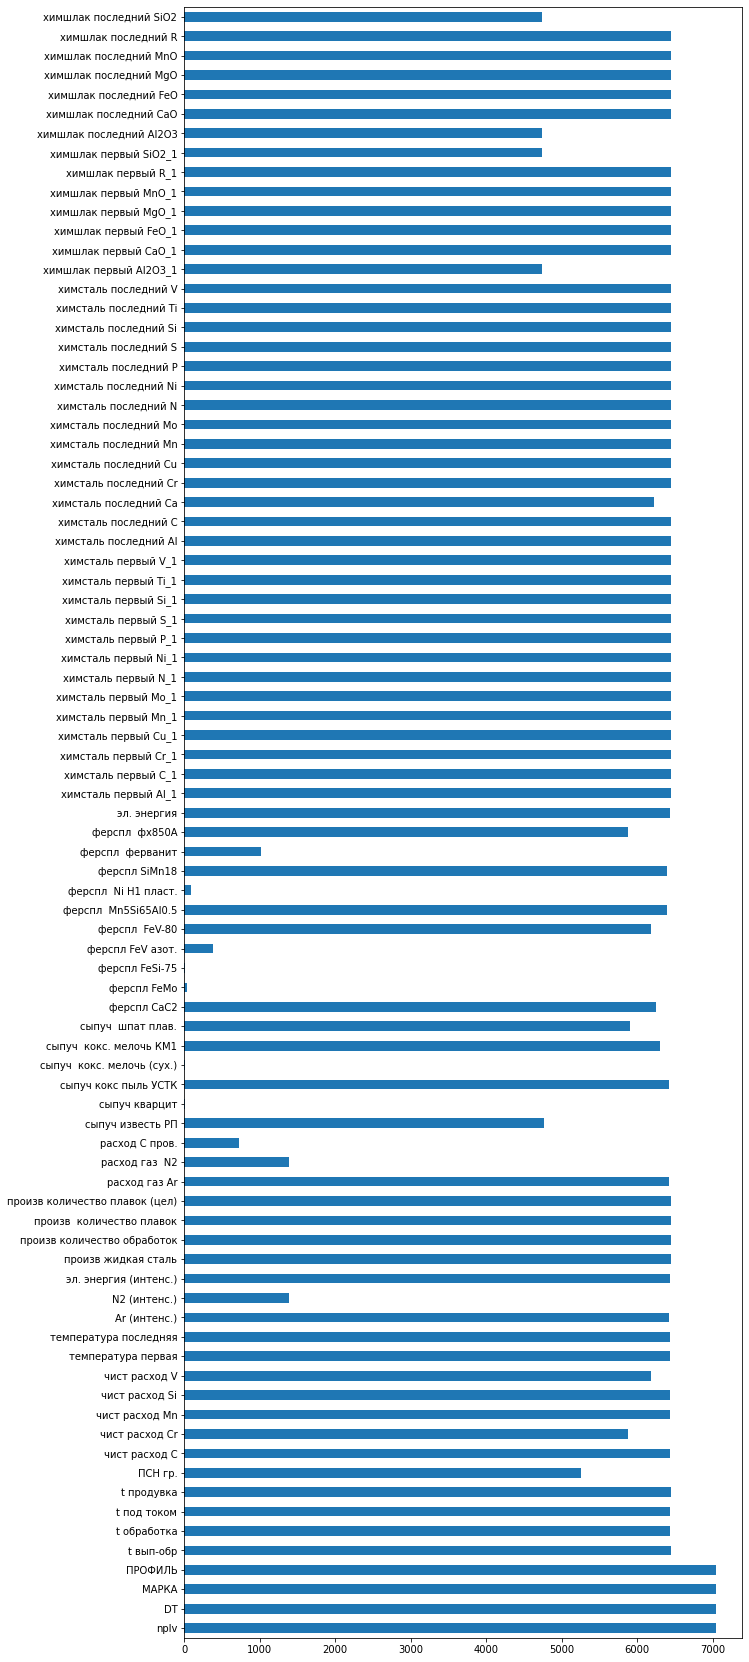

In [14]:
df_in.count().plot.barh(figsize=(10,30))

## Predict

In [15]:
df_in[['химшлак последний Al2O3', 
          'химшлак последний CaO',
          'химшлак последний R',
          'химшлак последний SiO2']].describe()

,химшлак последний Al2O3,химшлак последний CaO,химшлак последний R,химшлак последний SiO2
count,4742,6444,6444,4742
unique,70,229,16,116
top,"4,4","57,6","2,2","26,0"
freq,243,102,1483,142


In [16]:
# drop null
# Фильтруем данные в которых встречаются пропуски в одном из целевых столбцов
nan_filrt = df_in[['химшлак последний Al2O3', 
          'химшлак последний CaO',
          'химшлак последний R',
          'химшлак последний SiO2']].isna().apply(lambda x: False in list(x), axis=1)
# nan_filrt.value_counts()
df = df_in[nan_filrt]
df

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646",...,"0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285",...,"0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,"24,0","43,35","17,95","43,35",NaN,"0,331665",...,"0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945",...,"0,11","2,4",NaN,NaN,"60,3","0,5","6,3","0,12","2,6",NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,"20,0","48,5","17,0333333","48,5",NaN,"0,389875",...,"0,12","2,4",NaN,NaN,"60,3","0,6","4,5","0,09","2,5",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,г68386398<;,2071-04-21 19:50:00,Э90ХАФ,Р65,"41,0","42,3333333","23,2","42,1666667","3,3806283","0,53708",...,"0,1","2,6","22,2","7,0","60,6","0,4","6,2","0,06","2,7","22,8"
7037,г68386398<<,2071-04-21 20:45:00,Э90ХАФ,Р65,"36,0","46,5333333","16,1833333","46,3833333",NaN,"0,555875",...,"0,1","2,2","24,5","4,9","53,0","0,5","11,1","0,25","2,4","22,3"
7038,г68386398<=,2071-04-21 21:34:00,Э90ХАФ,Р65,"42,0","47,5666667","23,0166667","47,1","2,2630044","0,548385",...,"0,13","2,7","20,0","5,2","55,4","0,7","6,7","0,13","2,2","25,0"
7039,г68386398<>,2071-04-21 22:25:00,Э90ХАФ,Р65,"45,0","46,0333333","17,5333333","45,6833333","3,0","0,60135",...,"0,18","2,1","24,5","4,9","55,1","0,4","8,9","0,16","2,1","26,0"
